<a href="https://colab.research.google.com/github/dr14nium/catmate-ml/blob/main/CatMate_Bangkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tqdm import tqdm

print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print(
    "\u2022 GPU Device Found."
    if tf.test.is_gpu_available()
    else "\u2022 GPU Device Not Found. Running on CPU"
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


• Using TensorFlow Version: 2.12.0
• Using TensorFlow Hub Version:  0.13.0
• GPU Device Not Found. Running on CPU


In [ ]:
module_selection = "(\"mobilenet_v2\", 224, 1280)"
handle_base, pixels, FV_SIZE = eval(module_selection)
MODULE_HANDLE = "https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))


Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
# Menghubungkan direktori data
path = os.path.join(os.getcwd(), "drive", "MyDrive")  # comment this for local use
data_path = os.path.join(path, "Dataset")  # change path to os.getcwd()
train_path = os.path.join(data_path, "train")  # Use 'data_path' instead of 'data'
test_path = os.path.join(data_path, "test")

categories = ["bengal", "birman", "bombay", "himalayan", "persia", "ragdoll", "scottishfold", "siamese", "sphynx"]

train_paths = {}
for category in categories:
    train_paths[category] = os.path.join(train_path, category)


In [ ]:
# Cek isi file
for category in categories:
    train_paths[category] = os.path.join(train_path, category)
    files = os.listdir(train_paths[category])
    num_files = len(files)
    print(f"Number of files in {category} directory: {num_files}")

Number of files in bengal directory: 15
Number of files in birman directory: 15
Number of files in bombay directory: 15
Number of files in himalayan directory: 15
Number of files in persia directory: 15
Number of files in ragdoll directory: 15
Number of files in scottishfold directory: 15
Number of files in siamese directory: 15
Number of files in sphynx directory: 15


In [ ]:
# Mengatur hyperparameter
BATCH_SIZE = 10
IMG_SIZE = (224, 224)

In [ ]:
# Membuat dataset dari direktori
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    labels='inferred',
    label_mode='categorical',
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    shuffle=False,  # Tidak perlu diacak saat pengujian
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    labels='inferred',
    label_mode='categorical'
)

Found 135 files belonging to 9 classes.
Found 55 files belonging to 9 classes.


In [ ]:
# Normalisasi data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Membangun model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

In [ ]:
# Mengkompilasi dan melatih model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
    train_dataset,
    epochs=30
)

Epoch 1/30
14/14 [==============================] - 20s 1s/step - loss: 2.6725 - accuracy: 0.0963
Epoch 2/30
14/14 [==============================] - 9s 585ms/step - loss: 2.1418 - accuracy: 0.2074
Epoch 3/30
14/14 [==============================] - 8s 539ms/step - loss: 1.8625 - accuracy: 0.3556
Epoch 4/30
14/14 [==============================] - 10s 625ms/step - loss: 1.4888 - accuracy: 0.4889
Epoch 5/30
14/14 [==============================] - 10s 699ms/step - loss: 0.8710 - accuracy: 0.6963
Epoch 6/30
14/14 [==============================] - 8s 540ms/step - loss: 0.8656 - accuracy: 0.7778
Epoch 7/30
14/14 [==============================] - 10s 703ms/step - loss: 0.4089 - accuracy: 0.8963
Epoch 8/30
14/14 [==============================] - 9s 643ms/step - loss: 0.3042 - accuracy: 0.9185
Epoch 9/30
14/14 [==============================] - 10s 682ms/step - loss: 0.1829 - accuracy: 0.9704
Epoch 10/30
14/14 [==============================] - 10s 604ms/step - loss: 0.1098 - accuracy: 0.9

In [ ]:
# Evaluasi pada dataset test
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

6/6 [==============================] - 1s 159ms/step - loss: 4.0655 - accuracy: 0.3455
Test accuracy: 0.34545454382896423


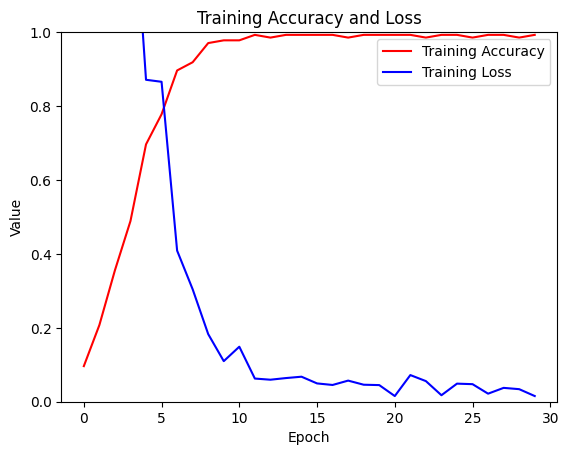

In [ ]:
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, loss, 'b', label='Training Loss')

plt.title('Training Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.ylim(0, 1)  # Mengatur batas skala y menjadi 0 hingga 1
plt.show()


In [ ]:
# Simpan model
model.save('/content/drive/MyDrive/Hasil Model')


1/1 [==============================] - 0s 142ms/step


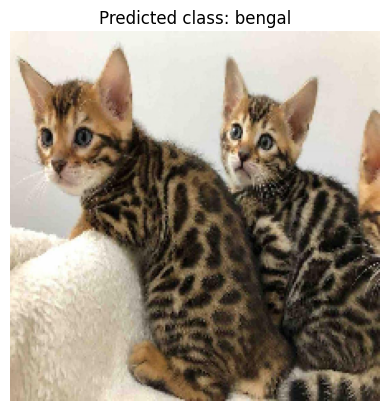

1/1 [==============================] - 0s 44ms/step


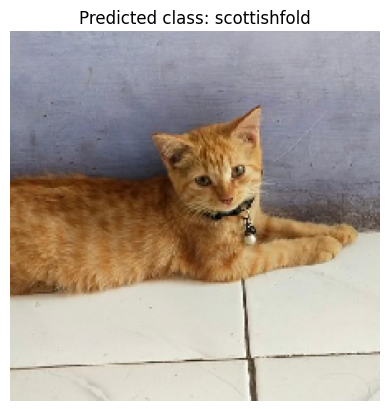

1/1 [==============================] - 0s 42ms/step


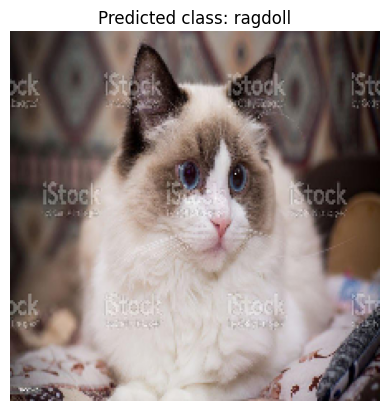

In [ ]:
# Load model
model = tf.keras.models.load_model('/content/drive/MyDrive/Hasil Model')

# Path to test images
test_image_paths = [
    '/content/drive/MyDrive/Dataset/test/bengal/bengal (16).jpeg',
    '/content/drive/MyDrive/Dataset/test/persia/persia (16).jpeg',
    '/content/drive/MyDrive/Dataset/test/ragdoll/ragdoll (16).jpeg',
    # Add more test image paths as needed
]

# Preprocess and predict on test images
for image_path in test_image_paths:
    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=IMG_SIZE
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = img_array / 255.0  # Normalize the image

    # Perform prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = categories[predicted_class_index]

    # Display the image and predicted class
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis('off')
    plt.show()


## Deploy dengan NGROK

In [ ]:
!pip install pyngrok


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=e09b97a9d7049017e540a3839b1b3331f0acee97f30c385d4a29f08be3a5b8b2
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok
